<a href="https://colab.research.google.com/github/packtpublishing/Machine-Learning-for-Imbalanced-Data/blob/main/chapter04/chapter04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# !pip install imbalanced-learn==0.10.1

import warnings
import pandas as pd
import numpy as np
warnings.filterwarnings('ignore')

# Plotting helper function

In [6]:
X = pd.read_csv('/kaggle/input/Train_60 2/X_Train_Data_Input.csv')
y = pd.read_csv('/kaggle/input/Train_60 2/Y_Train_Data_Target.csv')
X_test = pd.read_csv('/kaggle/input/Train_60 2/X_Test_Data_Input_20.csv')
y_test = pd.read_csv('/kaggle/input/Train_60 2/Y_Test_Data_Target_20.csv')

# Create dataset

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

X = X.drop(columns=['ID'])
X_test = X_test.drop(columns=['ID'])
imputer = SimpleImputer(strategy='mean')
# scaler = StandardScaler()
# X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
# X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)
X_test = pd.DataFrame(imputer.fit_transform(X_test), columns=X_test.columns)
y = y.drop(columns=['ID'])
y_test = y_test.drop(columns=['ID'])
y = np.array(y['target'])
y_test = np.array(y_test['target'])
print(X.columns,y)

NameError: name 'np' is not defined

# Boosting Classifier via sklearn.ensemble.AdaBoostClassifier

Overall Results:
              Metric  Overall Score
0           Accuracy       0.975932
1          Precision       0.823017
2             Recall       0.948780
3           F1-Score       0.881435
4            AUC-ROC       0.993791
5  Balanced Accuracy       0.963769

Class-wise Results:
      Metric   Class 0   Class 1
0  Precision  0.994581  0.823017
1     Recall  0.978758  0.948780
2   F1-Score  0.986606  0.881435
3   F2-Score  0.981882  0.920644


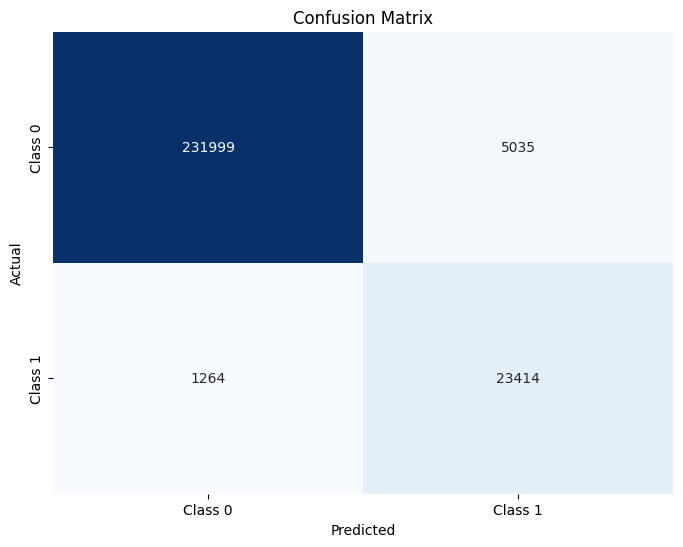

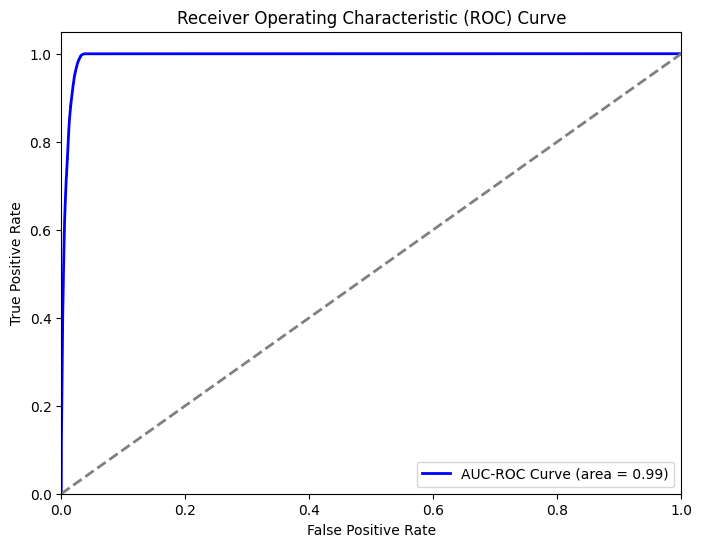

Training time: 178.455833 seconds
Inference time per sample: 3.04 microseconds


In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    roc_auc_score, balanced_accuracy_score, roc_curve, auc, confusion_matrix,
    PrecisionRecallDisplay
)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

# Assuming X and y are already defined and split into train and test sets (X_train, X_test, y_train, y_test)

# Measure training time
start_train_time = time.time()

# Initialize Gradient Boosting Classifier
boosting_clf = GradientBoostingClassifier(random_state=42)

# Fit the model
boosting_clf.fit(X, y)

end_train_time = time.time()

# Calculate training time in seconds
training_time_seconds = end_train_time - start_train_time

# Measure inference time
start_inference_time = time.time()

# Make predictions on the test set
y_pred = boosting_clf.predict(X_test)
y_pred_proba = boosting_clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

end_inference_time = time.time()

# Calculate inference time per sample in microseconds
inference_time_seconds = end_inference_time - start_inference_time
num_samples = X_test.shape[0]
inference_time_per_sample_microseconds = (inference_time_seconds / num_samples) * 1_000_000

# Calculate overall metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Binary precision
recall = recall_score(y_test, y_pred, average='binary')        # Binary recall
f1 = f1_score(y_test, y_pred, average='binary')                # Binary F1-score
roc_auc = roc_auc_score(y_test, y_pred_proba)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Calculate class-wise metrics
precision_class = precision_score(y_test, y_pred, average=None)  # Class-wise precision
recall_class = recall_score(y_test, y_pred, average=None)        # Class-wise recall
f1_class = f1_score(y_test, y_pred, average=None)                # Class-wise F1-score
f2_class = fbeta_score(y_test, y_pred, beta=2, average=None)     # Class-wise F2-score

# Create a DataFrame to display overall and class-wise results
results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC", "Balanced Accuracy"],
    "Overall Score": [accuracy, precision, recall, f1, roc_auc, balanced_acc],
})

# Create a DataFrame for class-wise metrics
class_wise_metrics = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-Score", "F2-Score"],
    "Class 0": [precision_class[0], recall_class[0], f1_class[0], f2_class[0]],
    "Class 1": [precision_class[1], recall_class[1], f1_class[1], f2_class[1]]
})

# Display the results
print("Overall Results:")
print(results)

print("\nClass-wise Results:")
print(class_wise_metrics)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot the AUC-ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f'AUC-ROC Curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Print training and inference times
print(f"Training time: {training_time_seconds:.6f} seconds")
print(f"Inference time per sample: {inference_time_per_sample_microseconds:.2f} microseconds")


# RUSBoostClassifier

Overall Results:
              Metric  Overall Score
0           Accuracy       0.968924
1          Precision       0.753098
2             Recall       0.997447
3           F1-Score       0.858219
4            AUC-ROC       0.993022
5  Balanced Accuracy       0.981701

Class-wise Results:
      Metric   Class 0   Class 1
0  Precision  0.999725  0.753098
1     Recall  0.965954  0.997447
2   F1-Score  0.982549  0.858219
3   F2-Score  0.972525  0.936665


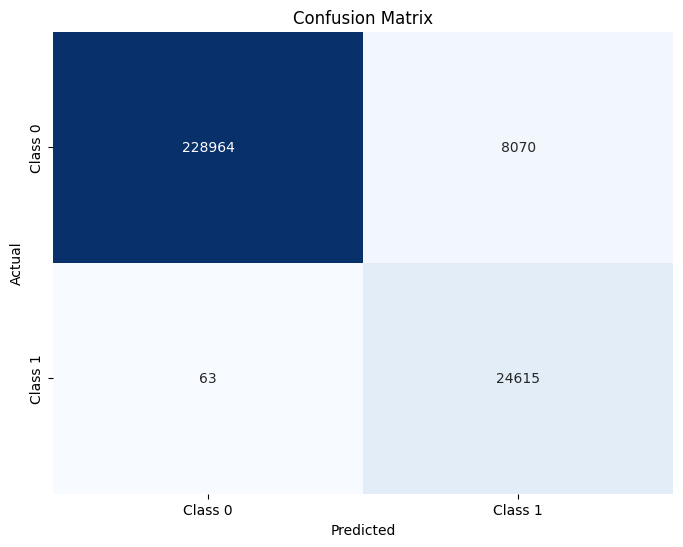

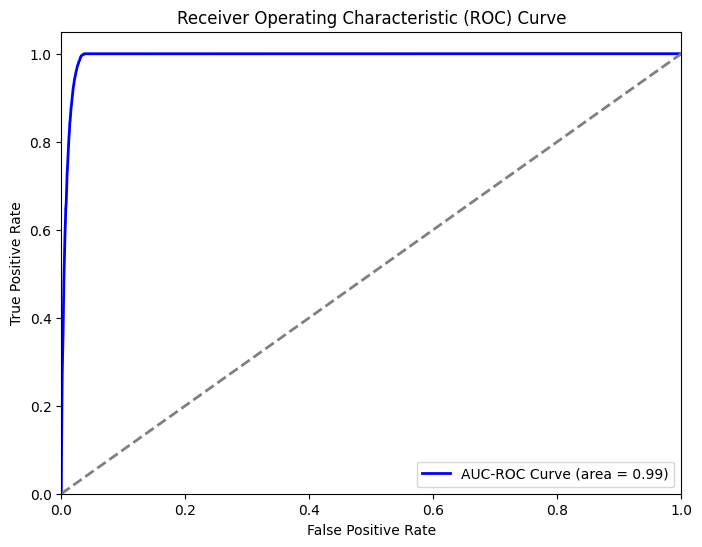

Training time: 28.403211 seconds
Inference time per sample: 12.99 microseconds


In [20]:
from imblearn.ensemble import RUSBoostClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    roc_auc_score, balanced_accuracy_score, roc_curve, auc, confusion_matrix,
    PrecisionRecallDisplay
)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

# Assuming X and y are already defined and split into train and test sets (X_train, X_test, y_train, y_test)

# Measure training time
start_train_time = time.time()

# Initialize RUSBoost Classifier
rus_clf = RUSBoostClassifier(random_state=42)

# Fit the model
rus_clf.fit(X, y)

end_train_time = time.time()

# Calculate training time in seconds
training_time_seconds = end_train_time - start_train_time

# Measure inference time
start_inference_time = time.time()

# Make predictions on the test set
y_pred = rus_clf.predict(X_test)
y_pred_proba = rus_clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

end_inference_time = time.time()

# Calculate inference time per sample in microseconds
inference_time_seconds = end_inference_time - start_inference_time
num_samples = X_test.shape[0]
inference_time_per_sample_microseconds = (inference_time_seconds / num_samples) * 1_000_000

# Calculate overall metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Binary precision
recall = recall_score(y_test, y_pred, average='binary')        # Binary recall
f1 = f1_score(y_test, y_pred, average='binary')                # Binary F1-score
roc_auc = roc_auc_score(y_test, y_pred_proba)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Calculate class-wise metrics
precision_class = precision_score(y_test, y_pred, average=None)  # Class-wise precision
recall_class = recall_score(y_test, y_pred, average=None)        # Class-wise recall
f1_class = f1_score(y_test, y_pred, average=None)                # Class-wise F1-score
f2_class = fbeta_score(y_test, y_pred, beta=2, average=None)     # Class-wise F2-score

# Create a DataFrame to display overall and class-wise results
results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC", "Balanced Accuracy"],
    "Overall Score": [accuracy, precision, recall, f1, roc_auc, balanced_acc],
})

# Create a DataFrame for class-wise metrics
class_wise_metrics = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-Score", "F2-Score"],
    "Class 0": [precision_class[0], recall_class[0], f1_class[0], f2_class[0]],
    "Class 1": [precision_class[1], recall_class[1], f1_class[1], f2_class[1]]
})

# Display the results
print("Overall Results:")
print(results)

print("\nClass-wise Results:")
print(class_wise_metrics)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot the AUC-ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f'AUC-ROC Curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Print training and inference times
print(f"Training time: {training_time_seconds:.6f} seconds")
print(f"Inference time per sample: {inference_time_per_sample_microseconds:.2f} microseconds")


# EasyEnsemble

Overall Results:
              Metric  Overall Score
0           Accuracy       0.963506
1          Precision       0.720968
2             Recall       1.000000
3           F1-Score       0.837863
4            AUC-ROC       0.992211
5  Balanced Accuracy       0.979853

Class-wise Results:
      Metric   Class 0   Class 1
0  Precision  1.000000  0.720968
1     Recall  0.959706  1.000000
2   F1-Score  0.979439  0.837863
3   F2-Score  0.967503  0.928156


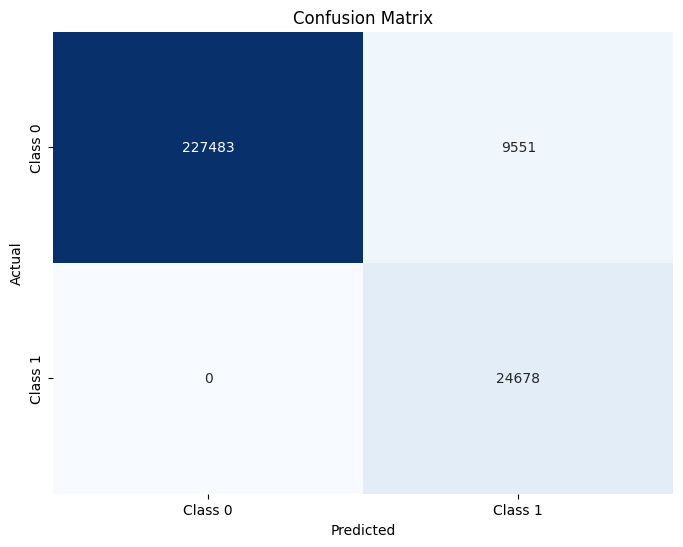

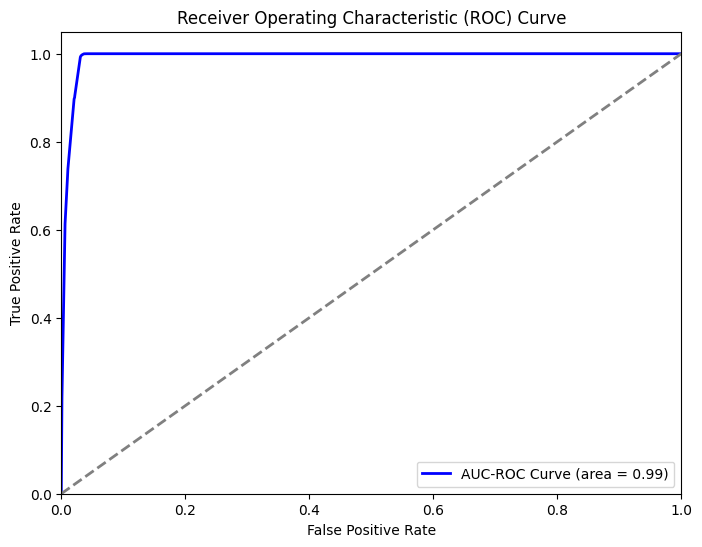

Training time: 96.368036 seconds
Inference time per sample: 64.12 microseconds


In [21]:
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    roc_auc_score, balanced_accuracy_score, roc_curve, auc, confusion_matrix,
    PrecisionRecallDisplay
)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

# Assuming X and y are already defined and split into train and test sets (X_train, X_test, y_train, y_test)

# Measure training time
start_train_time = time.time()

# Initialize Easy Ensemble Classifier
easy_ensemble_clf = EasyEnsembleClassifier(random_state=42)

# Fit the model
easy_ensemble_clf.fit(X, y)

end_train_time = time.time()

# Calculate training time in seconds
training_time_seconds = end_train_time - start_train_time

# Measure inference time
start_inference_time = time.time()

# Make predictions on the test set
y_pred = easy_ensemble_clf.predict(X_test)
y_pred_proba = easy_ensemble_clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

end_inference_time = time.time()

# Calculate inference time per sample in microseconds
inference_time_seconds = end_inference_time - start_inference_time
num_samples = X_test.shape[0]
inference_time_per_sample_microseconds = (inference_time_seconds / num_samples) * 1_000_000

# Calculate overall metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Binary precision
recall = recall_score(y_test, y_pred, average='binary')        # Binary recall
f1 = f1_score(y_test, y_pred, average='binary')                # Binary F1-score
roc_auc = roc_auc_score(y_test, y_pred_proba)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Calculate class-wise metrics
precision_class = precision_score(y_test, y_pred, average=None)  # Class-wise precision
recall_class = recall_score(y_test, y_pred, average=None)        # Class-wise recall
f1_class = f1_score(y_test, y_pred, average=None)                # Class-wise F1-score
f2_class = fbeta_score(y_test, y_pred, beta=2, average=None)     # Class-wise F2-score

# Create a DataFrame to display overall and class-wise results
results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC", "Balanced Accuracy"],
    "Overall Score": [accuracy, precision, recall, f1, roc_auc, balanced_acc],
})

# Create a DataFrame for class-wise metrics
class_wise_metrics = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-Score", "F2-Score"],
    "Class 0": [precision_class[0], recall_class[0], f1_class[0], f2_class[0]],
    "Class 1": [precision_class[1], recall_class[1], f1_class[1], f2_class[1]]
})

# Display the results
print("Overall Results:")
print(results)

print("\nClass-wise Results:")
print(class_wise_metrics)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot the AUC-ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f'AUC-ROC Curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Print training and inference times
print(f"Training time: {training_time_seconds:.6f} seconds")
print(f"Inference time per sample: {inference_time_per_sample_microseconds:.2f} microseconds")


# XGBoost

Overall Results:
              Metric  Overall Score
0           Accuracy       0.977009
1          Precision       0.865172
2             Recall       0.895778
3           F1-Score       0.880209
4            AUC-ROC       0.994683
5  Balanced Accuracy       0.940622

Class-wise Results:
      Metric   Class 0   Class 1
0  Precision  0.989109  0.865172
1     Recall  0.985466  0.895778
2   F1-Score  0.987284  0.880209
3   F2-Score  0.986193  0.889484


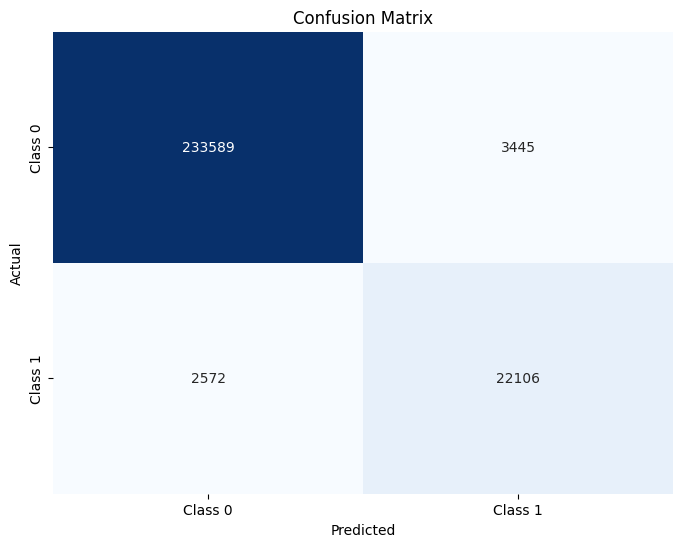

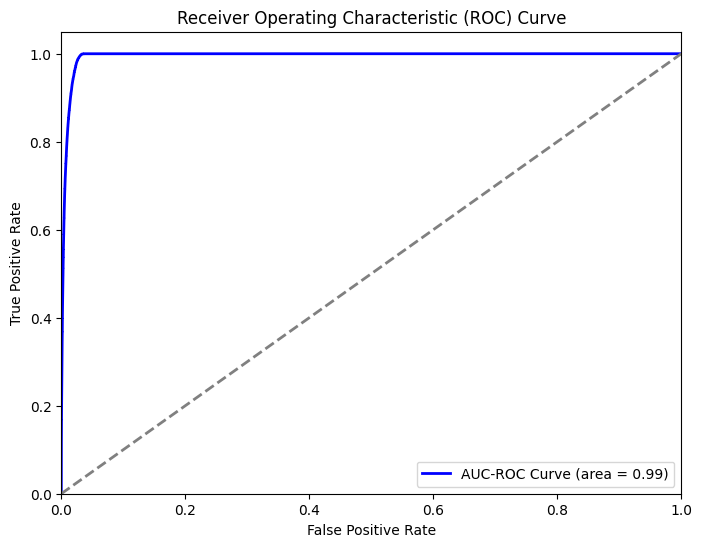

Training time: 6.182425 seconds
Inference time per sample: 1.55 microseconds


In [22]:
import xgboost as xgb
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    roc_auc_score, balanced_accuracy_score, roc_curve, auc, confusion_matrix,
    PrecisionRecallDisplay
)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

# Assuming X and y are already defined and split into train and test sets (X_train, X_test, y_train, y_test)

# Measure training time
start_train_time = time.time()

# Initialize XGBoost Classifier
xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Fit the model
xgb_clf.fit(X, y)

end_train_time = time.time()

# Calculate training time in seconds
training_time_seconds = end_train_time - start_train_time

# Measure inference time
start_inference_time = time.time()

# Make predictions on the test set
y_pred = xgb_clf.predict(X_test)
y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

end_inference_time = time.time()

# Calculate inference time per sample in microseconds
inference_time_seconds = end_inference_time - start_inference_time
num_samples = X_test.shape[0]
inference_time_per_sample_microseconds = (inference_time_seconds / num_samples) * 1_000_000

# Calculate overall metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')  # Binary precision
recall = recall_score(y_test, y_pred, average='binary')        # Binary recall
f1 = f1_score(y_test, y_pred, average='binary')                # Binary F1-score
roc_auc = roc_auc_score(y_test, y_pred_proba)
balanced_acc = balanced_accuracy_score(y_test, y_pred)

# Calculate class-wise metrics
precision_class = precision_score(y_test, y_pred, average=None)  # Class-wise precision
recall_class = recall_score(y_test, y_pred, average=None)        # Class-wise recall
f1_class = f1_score(y_test, y_pred, average=None)                # Class-wise F1-score
f2_class = fbeta_score(y_test, y_pred, beta=2, average=None)     # Class-wise F2-score

# Create a DataFrame to display overall and class-wise results
results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1-Score", "AUC-ROC", "Balanced Accuracy"],
    "Overall Score": [accuracy, precision, recall, f1, roc_auc, balanced_acc],
})

# Create a DataFrame for class-wise metrics
class_wise_metrics = pd.DataFrame({
    "Metric": ["Precision", "Recall", "F1-Score", "F2-Score"],
    "Class 0": [precision_class[0], recall_class[0], f1_class[0], f2_class[0]],
    "Class 1": [precision_class[1], recall_class[1], f1_class[1], f2_class[1]]
})

# Display the results
print("Overall Results:")
print(results)

print("\nClass-wise Results:")
print(class_wise_metrics)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot the AUC-ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f'AUC-ROC Curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color="gray", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Print training and inference times
print(f"Training time: {training_time_seconds:.6f} seconds")
print(f"Inference time per sample: {inference_time_per_sample_microseconds:.2f} microseconds")


# Performance comparison of Boosting methods

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    roc_auc_score, balanced_accuracy_score, roc_curve, auc, confusion_matrix,
    average_precision_score, PrecisionRecallDisplay, precision_recall_curve
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, BalancedBaggingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, ClassifierMixin, clone

# Assuming X and y are already defined
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X
y_train = y
# Custom class to combine SMOTE with Bagging
class SMOTEBaggingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, base_estimator=None, n_estimators=10, random_state=None):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.random_state = random_state
        self.estimators_ = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            # Resample with SMOTE
            X_resampled, y_resampled = SMOTE(random_state=self.random_state).fit_resample(X, y)
            estimator = clone(self.base_estimator)
            estimator.fit(X_resampled, y_resampled)
            self.estimators_.append(estimator)
        return self

    def predict(self, X):
        predictions = np.array([estimator.predict(X) for estimator in self.estimators_])
        return np.round(np.mean(predictions, axis=0)).astype(int)

    def predict_proba(self, X):
        probabilities = np.array([estimator.predict_proba(X) for estimator in self.estimators_])
        return np.mean(probabilities, axis=0)

# Dictionary to hold model results
results = {}

# Function to train and evaluate a model
def train_and_evaluate_model(model, model_name):
    start_train_time = time.time()
    model.fit(X_train, y_train)
    end_train_time = time.time()
    
    # Measure inference time
    start_inference_time = time.time()
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    end_inference_time = time.time()

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)

    # Store results
    results[model_name] = {
        "model": model,  # Store the model instance
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": roc_auc,
        "balanced_acc": balanced_acc,
        "training_time": end_train_time - start_train_time,
        "inference_time_per_sample": (end_inference_time - start_inference_time) / len(X_test) * 1_000_000
    }

# 1. Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
train_and_evaluate_model(dt_clf, "Decision Tree")

# 2. Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
train_and_evaluate_model(rf_clf, "Random Forest")

# 3. Balanced Random Forest Classifier (Undersampling)
balanced_rf_clf = BalancedRandomForestClassifier(random_state=42)
train_and_evaluate_model(balanced_rf_clf, "Balanced Random Forest")

# 4. Balanced Bagging Classifier (Underbagging)
underbagging_clf = BalancedBaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
train_and_evaluate_model(underbagging_clf, "Balanced Bagging (Underbagging)")

# 5. Balanced Bagging Classifier with Oversampling (SMOTE)
smote_bagging_clf = SMOTEBaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
train_and_evaluate_model(smote_bagging_clf, "SMOTEBagging (Oversampling)")

# Plot AUC-ROC and Precision-Recall curves
plt.figure(figsize=(16, 14))  # Increased figure size

# AUC-ROC Curves
plt.subplot(2, 1, 1)
for model_name, metrics in results.items():
    y_pred_proba = metrics["model"].predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {metrics['roc_auc']:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random predictions
plt.title('AUC-ROC Curves for Different Models', fontsize=18)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(loc='lower right')
plt.grid()

# Precision-Recall Curves
plt.subplot(2, 1, 2)
for model_name, metrics in results.items():
    y_pred_proba = metrics["model"].predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    plt.plot(recall, precision, label=model_name)
plt.title('Precision-Recall Curves for Different Models', fontsize=18)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.legend(loc='lower right')
plt.grid()

plt.tight_layout()
plt.show()

# Display overall results
for model_name, metrics in results.items():
    print(f"Results for {model_name}:")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  Recall: {metrics['recall']:.4f}")
    print(f"  F1 Score: {metrics['f1']:.4f}")
    print(f"  AUC-ROC: {metrics['roc_auc']:.4f}")
    print(f"  Balanced Accuracy: {metrics['balanced_acc']:.4f}")
    print(f"  Training Time: {metrics['training_time']:.4f} seconds")
    print(f"  Inference Time per Sample: {metrics['inference_time_per_sample']:.2f} microseconds")
    print("\n")
